<a href="https://colab.research.google.com/github/chetan0321/ML_FLASK090/blob/main/DBscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/income.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 660.0+ bytes
None


In [ ]:
print(df.columns)

Index(['Name', 'Age', 'Income($)'], dtype='object')


In [ ]:
#df.drop(['Income($)'],axis=1,inplace=True)(to delete)

In [ ]:
print(df.columns)

Index(['Name', 'Age', 'Income($)'], dtype='object')


In [ ]:
X = df[['Age', 'Income($)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
dbscan = DBSCAN(eps=0.78, min_samples=5)
dbscan.fit(X_scaled)
dbscan.labels_

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [ ]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

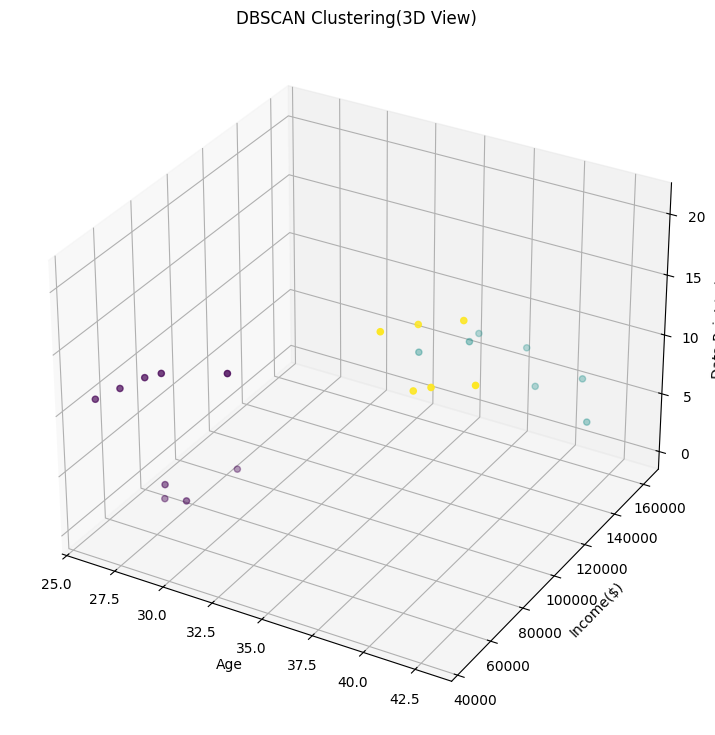

In [ ]:
pd.concat([df,cl],axis=1)
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111,projection='3d')

ax.scatter(df['Age'],df['Income($)'],df.index,c=dbscan.labels_)
ax.set_xlabel('Age')
ax.set_ylabel('Income($)')
ax.set_zlabel('Data Point Index')
ax.set_title('DBSCAN Clustering(3D View)')
plt.show()